In [21]:
import os
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Define the root directory where all the runs are stored
log_dir = os.path.expanduser('~/optimal_quad_control_RL/logs/nn_size_comparison')

# Initialize a list to store the data from all runs
all_data = []

# Iterate over each run directory
for run_dir in os.listdir(log_dir):
    full_run_dir = os.path.join(log_dir, run_dir)
    
    # Check if the directory is valid and not empty
    if os.path.isdir(full_run_dir):
        print(f"Processing directory: {full_run_dir}")  # Debug print
        # Iterate over each event file in the run directory
        for event_file in os.listdir(full_run_dir):
            event_file_path = os.path.join(full_run_dir, event_file)
            
            if os.path.isfile(event_file_path):
                print(f"Reading file: {event_file_path}")  # Debug print
                # Use TensorBoard's EventAccumulator to read the event file
                event_acc = EventAccumulator(event_file_path)
                event_acc.Reload()

                # Check if 'rollout/ep_rew_mean' tag exists and process it
                if 'rollout/ep_rew_mean' in event_acc.Tags()['scalars']:
                    # Get the data from the event file
                    data = event_acc.Scalars('rollout/ep_rew_mean')
                    df = pd.DataFrame(data, columns=['wall_time', 'step', 'value'])
                    
                    # Add the run directory as a new column
                    df['run'] = run_dir
                    
                    # Add the data to the list
                    all_data.append(df)

# Concatenate all the DataFrames into one
if all_data:
    full_data = pd.concat(all_data, ignore_index=True)
    print(full_data.head())  # Display the first few rows of the DataFrame
else:
    print("No data found.")

# Now 'full_data' contains the rollout/ep_rew_mean data from TensorBoard logs with run information


Processing directory: /home/robin/optimal_quad_control_RL/logs/nn_size_comparison/run2_32_32_32_0
Reading file: /home/robin/optimal_quad_control_RL/logs/nn_size_comparison/run2_32_32_32_0/events.out.tfevents.1725155829.mavlab-marvin.lr.tudelft.nl.1144918.73
Reading file: /home/robin/optimal_quad_control_RL/logs/nn_size_comparison/run2_32_32_32_0/events.out.tfevents.1725140210.mavlab-marvin.lr.tudelft.nl.1144918.13
Reading file: /home/robin/optimal_quad_control_RL/logs/nn_size_comparison/run2_32_32_32_0/events.out.tfevents.1725159215.mavlab-marvin.lr.tudelft.nl.1144918.86
Reading file: /home/robin/optimal_quad_control_RL/logs/nn_size_comparison/run2_32_32_32_0/events.out.tfevents.1725143841.mavlab-marvin.lr.tudelft.nl.1144918.27
Reading file: /home/robin/optimal_quad_control_RL/logs/nn_size_comparison/run2_32_32_32_0/events.out.tfevents.1725137643.mavlab-marvin.lr.tudelft.nl.1144918.3
Reading file: /home/robin/optimal_quad_control_RL/logs/nn_size_comparison/run2_32_32_32_0/events.out.tf

In [22]:
full_data

,wall_time,step,value,run
0,1.725156e+09,73100000,46.706055,run2_32_32_32_0
1,1.725156e+09,73200000,43.921688,run2_32_32_32_0
2,1.725156e+09,73300000,44.741310,run2_32_32_32_0
3,1.725156e+09,73400000,43.626232,run2_32_32_32_0
4,1.725156e+09,73500000,42.829403,run2_32_32_32_0
...,...,...,...,...
24144,1.725120e+09,28600000,54.898495,run1_128_128_0
24145,1.725120e+09,28700000,54.086735,run1_128_128_0
24146,1.725120e+09,28800000,56.438236,run1_128_128_0
24147,1.725120e+09,28900000,52.864418,run1_128_128_0


Run: run2_32_32_32_0, Number of layers: 3, Number of neurons: 32
Run: run0_256_256_256_0, Number of layers: 3, Number of neurons: 256
Run: run2_256_256_256_0, Number of layers: 3, Number of neurons: 256
Run: run0_32_32_0, Number of layers: 2, Number of neurons: 32
Run: run0_64_64_0, Number of layers: 2, Number of neurons: 64
Run: run0_32_32_32_0, Number of layers: 3, Number of neurons: 32
Run: run1_32_32_32_0, Number of layers: 3, Number of neurons: 32
Run: run1_256_256_0, Number of layers: 2, Number of neurons: 256
Run: run2_256_256_0, Number of layers: 2, Number of neurons: 256
Run: run0_256_256_0, Number of layers: 2, Number of neurons: 256
Run: run1_128_128_128_0, Number of layers: 3, Number of neurons: 128
Run: run2_128_128_128_0, Number of layers: 3, Number of neurons: 128
Run: run1_64_64_64_0, Number of layers: 3, Number of neurons: 64
Run: run2_64_64_0, Number of layers: 2, Number of neurons: 64
Run: run1_64_64_0, Number of layers: 2, Number of neurons: 64
Run: run2_64_64_64_0,

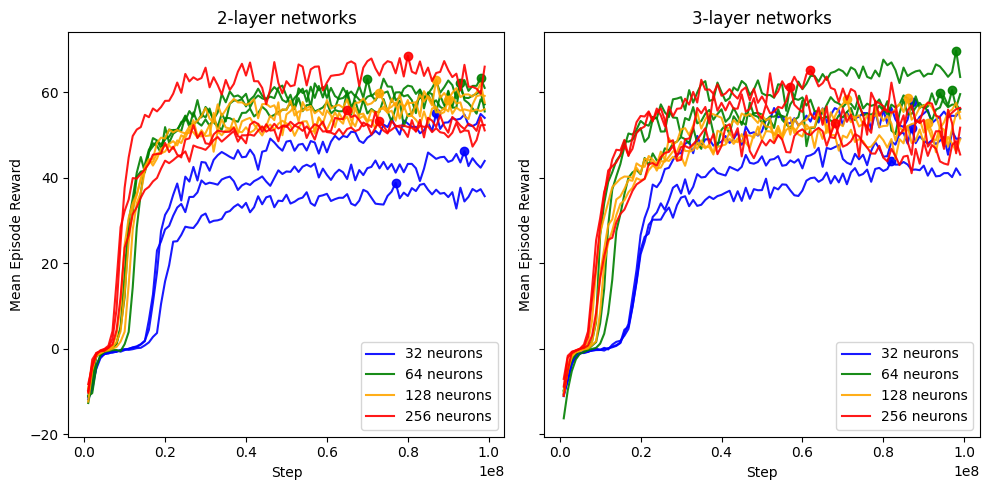

In [109]:
import matplotlib.pyplot as plt

def get_num_layers(run):
    return len(run.split('_'))-2

def get_num_neurons(run):
    return int(run.split('_')[1])

for run in full_data['run'].unique():
    print(f"Run: {run}, Number of layers: {get_num_layers(run)}, Number of neurons: {get_num_neurons(run)}")
    
# subplots plotting the mean episode reward for the 2-layer networks and 3-layer networks
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

# each network has either 32, 64, 128, or 256 neurons per layer
# we asign a color to each number of neurons
color = {32: 'blue', 64: 'green', 128: 'orange', 256: 'red'}
alpha = 0.9

info = {}          

for l in [2,3]:
    for n in [32,64,128,256]:
        info[(l,n)] = []
        for run in full_data['run'].unique():
            if get_num_layers(run) == l and get_num_neurons(run) == n:
                run_data = full_data[full_data['run'] == run]
                run_data = run_data.sort_values('step')
                run_data = run_data[run_data['step'] < 1e8]
                # only plot multiples of 1e6 steps
                run_data = run_data[run_data['step'] % 1e6 == 0]
                # get max value and its step
                max_value = run_data['value'].max()
                max_step = run_data[run_data['value'] == max_value]['step'].values[0]
                info[(l,n)].append({'run':run, 'data': run_data, 'max_value': max_value, 'max_step': max_step})
                axs[l-2].plot(max_step, max_value, 'o', color=color[n], alpha=alpha)
                axs[l-2].plot(run_data['step'], run_data['value'], label=f'{n} neurons', color=color[n], alpha=alpha)
    axs[l-2].set_title(f'{l}-layer networks')
    axs[l-2].set_xlabel('Step')
    axs[l-2].set_ylabel('Mean Episode Reward')
    # make legend and skip duplicate labels
    handles, labels = axs[l-2].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axs[l-2].legend(by_label.values(), by_label.keys())
fig.tight_layout()

Best run: run1_64_64_64_0, Mean Episode Reward: 69.66938018798828


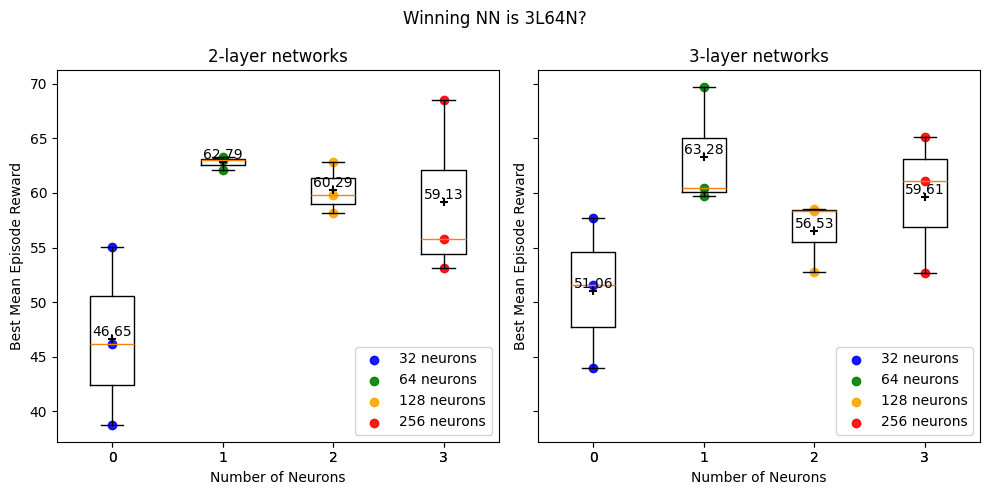

In [111]:
# subplots plotting the best episode reward for the 2-layer networks and 3-layer networks
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

for l in [2,3]:
    for idx, n in enumerate([32,64,128,256]):
        best_values = [i['max_value'] for i in info[(l,n)]]
        # box plot showing the best mean episode reward for l-layer n-neuron network
        axs[l-2].boxplot(best_values, positions=[idx], widths=0.4)
        # scatter plot of best values
        axs[l-2].scatter([idx]*len(best_values), best_values, color=color[n], alpha=alpha, label=f'{n} neurons')
        # + sign at mean
        axs[l-2].scatter(idx, sum(best_values)/len(best_values), marker='+', color='black')
        # write mean value (small and to the right of the + sign)
        axs[l-2].text(idx, sum(best_values)/len(best_values), f'{sum(best_values)/len(best_values):.2f}', va='bottom', ha='center')
    axs[l-2].set_title(f'{l}-layer networks')
    axs[l-2].set_xlabel('Number of Neurons')
    axs[l-2].set_ylabel('Best Mean Episode Reward')
    axs[l-2].legend()
fig.suptitle('Winning NN is 3L64N?')
fig.tight_layout()

# get best run with the highest mean episode reward
max_reward = 0
best_run = None
for key in info:
    for run in info[key]:
        if run['max_value'] > max_reward:
            max_reward = run['max_value']
            best_run = run
print(f"Best run: {best_run['run']}, Mean Episode Reward: {max_reward}")